In [ ]:
"""
importing library needed
"""

import pandas as pd
import re

# **Eksplorasi Data**

A. Data Abusive.csv

In [ ]:
df_abusive = pd.read_csv("/content/abusive.csv")
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [ ]:
print(df_abusive.info())
print('\n')
print(df_abusive.describe())
print('\n')
print(df_abusive.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None


       ABUSIVE
count      125
unique     125
top       alay
freq         1


ABUSIVE    0
dtype: int64


B. Data new_kamusalay.csv

In [ ]:
df_alay = pd.read_csv("/content/new_kamusalay.csv", encoding='iso-8859-1')
df_alay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [ ]:
print(df_alay.info())
print('\n')
print(df_alay.describe())
print('\n')
print(df_alay.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   anakjakartaasikasik       15166 non-null  object
 1   anak jakarta asyik asyik  15166 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB
None


       anakjakartaasikasik anak jakarta asyik asyik
count                15166                    15166
unique               15166                     8638
top           pakcikdahtua                     wkwk
freq                     1                      100


anakjakartaasikasik         0
anak jakarta asyik asyik    0
dtype: int64


C. Data data.csv

In [ ]:
df_data = pd.read_csv("/content/data.csv", encoding='iso-8859-1')
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
print(df_data.info())
print('\n')
print(df_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB
None


                 HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.3

In [ ]:
df_data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

# **Data Manipulation**

In [ ]:
range(df_data.shape[0])

range(0, 13169)

In [ ]:
df_data_filtered = df_data.drop('Tweet', axis=1, inplace= False)
df_data_filtered.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df_data['Classification'] = "Dummy"
for i in range(df_data_filtered.shape[0]):
    if 1 in df_data_filtered.loc[i].tolist():
        df_data['Classification'][i] = "yes"
    else:
        df_data['Classification'][i] = "no"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Classification
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,no
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,no
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,yes


# **Data Visualization**

In [ ]:
df_data['Classification'].value_counts()

yes    7309
no     5860
Name: Classification, dtype: int64

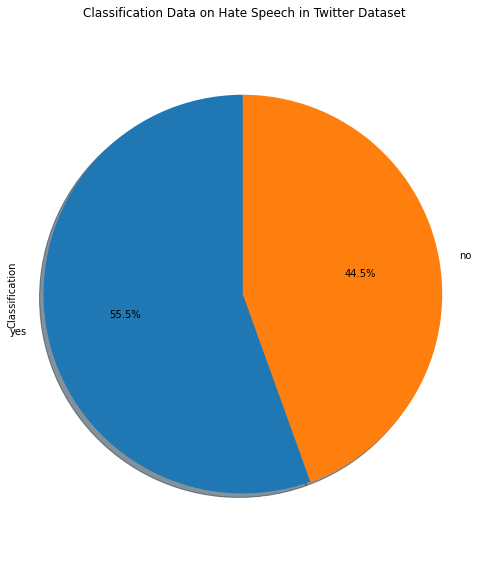

In [ ]:
import matplotlib.pyplot as plt

df_data['Classification'].value_counts().plot(kind='pie',
                            figsize=(8, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Classification Data on Hate Speech in Twitter Dataset')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()